# CAPSTONE 3. Predicting Next Cryptocyrrency Market Cycle Peak.
## Exploratory Data Analysis
In this notebook we will perform Exploratory Data Analysis. The goal of this notebook is to take a closer look at our data and see if we can extract any insights from it. The questions we would like to answer by the end of this notebook are:<br>
<ul><i>What is the biggest token in terms of total market capitalization?<br>
    What is the biggest token in terms of trading volume?<br>
    What token has the highest price?<br>
    What token shows the highest ROI?<br>
    Is there any intercorrelation between tokens' prices?<br>
    What are the summary statistics for each coin and for all coins combined?<br>
    What features are correlated with each other?<br>
    What is the nature of this correlation?</i><br>
</ul>
This is not a complete list by any means. During our analysis we will come up with some other quiestions and we will answer them right away. <br>
Let's start.

In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

#setting default figure size
sns.set(rc={"figure.figsize":(12, 5)})
plt.rcParams['figure.figsize'] = (12, 5)

sns.set_style('whitegrid')

#showing only 2 decimals for floats
pd.options.display.float_format = "{:.3f}".format

In [2]:
df = pd.read_csv('../DW/Data_for_EDA.csv')

In [3]:
df.head()

,Date,Open_BTC,High_BTC,Low_BTC,Close_BTC,Volume_BTC,MarketCap_BTC,Open_ETH,High_ETH,Low_ETH,...,Low_XRP,Close_XRP,Volume_XRP,MarketCap_XRP,Open_LTC,High_LTC,Low_LTC,Close_LTC,Volume_LTC,MarketCap_LTC
0,2021-01-24,31794.328,32938.766,31106.686,31786.879,46807683072.000,596744391345.353,1329.801,1362.218,1225.867,...,0.270,0.273,2453091328.000,12353173876.274,141.666,142.619,134.478,138.431,4809200128.000,9138226063.308
1,2021-01-19,36642.234,37755.891,36069.805,36069.805,57244195486.000,682647247200.097,1257.435,1432.300,1254.523,...,0.284,0.294,5583136814.000,12954366484.188,152.198,165.924,150.488,153.487,9314780275.000,10083146649.994
2,2021-01-18,35792.238,37299.285,34883.844,36630.074,49511702429.000,672291934493.440,1230.313,1259.450,1187.311,...,0.273,0.285,3239112861.000,12608874407.396,142.435,154.526,138.811,152.144,6640211538.000,9516266561.269
3,2021-01-17,36163.648,36722.352,34069.320,35791.277,52359854336.000,674660879866.020,1233.453,1265.645,1174.389,...,0.271,0.277,3488557208.000,12752821363.443,144.225,146.824,137.070,142.431,6098835633.000,9564493948.549
4,2021-01-16,36821.648,37864.367,35633.555,36178.141,57706187875.000,684304915288.226,1171.443,1290.054,1157.624,...,0.277,0.280,4116256006.000,12758648527.013,144.188,152.061,140.002,144.265,7183807955.000,9537424849.722


In [4]:
df = df.sort_values(by='Date')

This is the general overview of our data.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 1991 to 0
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1992 non-null   object 
 1   Open_BTC       1992 non-null   float64
 2   High_BTC       1992 non-null   float64
 3   Low_BTC        1992 non-null   float64
 4   Close_BTC      1992 non-null   float64
 5   Volume_BTC     1992 non-null   float64
 6   MarketCap_BTC  1992 non-null   float64
 7   Open_ETH       1992 non-null   float64
 8   High_ETH       1992 non-null   float64
 9   Low_ETH        1992 non-null   float64
 10  Close_ETH      1992 non-null   float64
 11  Volume_ETH     1992 non-null   float64
 12  MarketCap_ETH  1992 non-null   float64
 13  Open_XRP       1992 non-null   float64
 14  High_XRP       1992 non-null   float64
 15  Low_XRP        1992 non-null   float64
 16  Close_XRP      1992 non-null   float64
 17  Volume_XRP     1992 non-null   float64
 18  MarketCa

As we know from the Data Wrangling step, we don't have any missing values, out dates are Datetime objetcs and are numbers are floats. Now, let's see the period our data spans for and take a look at the summary statistics for each of the tokens.

In [6]:
print(df['Date'].min())
print(df['Date'].max())

2015-08-07
2021-01-24


The earliest observation we have was made on August 7, 2015. The latest one was made on January 24, 2021.

In [7]:
#creating a list of column names for each tokens
BTC_cols = [col for col in df.columns if '_BTC' in col]
ETH_cols = [col for col in df.columns if '_ETH' in col]
XRP_cols = [col for col in df.columns if '_XRP' in col]
LTC_cols = [col for col in df.columns if '_LTC' in col]
cols = [BTC_cols, ETH_cols, XRP_cols, LTC_cols]

In [8]:
#printing summary statistics for each token
for column in cols:
    print(df[column].describe())
    print('')

       Open_BTC  High_BTC   Low_BTC  Close_BTC       Volume_BTC  \
count  1992.000  1992.000  1992.000   1992.000         1992.000   
mean   5986.516  6147.135  5822.001   6004.420  11189857060.390   
std    5609.588  5812.073  5396.921   5648.696  14516825003.003   
min     210.068   226.321   199.567    210.495     12712600.000   
25%     784.036   793.336   778.713    789.124    136401748.000   
50%    5960.283  6204.935  5788.672   5995.439   4849862797.500   
75%    9122.411  9277.120  8875.134   9125.615  18130616335.500   
max   40788.641 41946.738 38980.875  40797.609 123320567398.000   

         MarketCap_BTC  
count         1992.000  
mean  106062101678.711  
std   103056975635.132  
min     3053595830.271  
25%    12647244934.525  
50%   102315407243.382  
75%   161883899601.319  
max   758971014787.360  

       Open_ETH  High_ETH  Low_ETH  Close_ETH      Volume_ETH    MarketCap_ETH
count  1992.000  1992.000 1992.000   1992.000        1992.000         1992.000
mean    232.

We can see from the statistics above that 'total_volume' and 'market_cap' are quite huge. To make it easier for observing we will convert volume values to be shown <b>in millions</b> and market_cap to be shown <b>in billions</b>

In [9]:
#creating lists of total_volume columns and market_cap columns
vol_cols = [col for col in df.columns if 'Volume_' in col]
mc_cols = [col for col in df.columns if 'MarketCap_' in col]

#dividing total volume(market cap) by one million(one billion) to get volume(market cap) in millions(billions)
df[vol_cols] = df[vol_cols] / 1000000
df[mc_cols] = df[mc_cols] / 1000000000

In [10]:
df.head(3)

,Date,Open_BTC,High_BTC,Low_BTC,Close_BTC,Volume_BTC,MarketCap_BTC,Open_ETH,High_ETH,Low_ETH,...,Low_XRP,Close_XRP,Volume_XRP,MarketCap_XRP,Open_LTC,High_LTC,Low_LTC,Close_LTC,Volume_LTC,MarketCap_LTC
1991,2015-08-07,278.741,280.392,276.366,279.585,42.485,4.016,2.832,3.537,2.521,...,0.008,0.008,0.364,0.260,4.063,4.221,3.970,4.208,4.193,0.172
1990,2015-08-08,279.742,279.928,260.710,260.997,58.533,3.746,2.794,2.799,0.715,...,0.008,0.008,0.678,0.270,4.221,4.224,3.835,3.855,4.918,0.161
1989,2015-08-10,265.478,267.032,262.596,264.470,20.979,3.817,0.714,0.730,0.637,...,0.009,0.009,0.473,0.279,3.901,3.980,3.898,3.949,2.240,0.164


Great. Now it's much easier to see the trading volume and market capitalization of each token. Now we have all the data needed to proceed and answer our questions from the beginning of the notebook.<br>
<br>
Let's formulate a hypothesis now. <br>
<b>1. Null Hypothesis - The next crypto market bull cycle has not started yet
   2. Alternate Hypothesis - The enxt crypto market bull cycle has already started --- HOW TO QUANTIFY IT???

## 1. Largest Token (Total Market Capitalization)

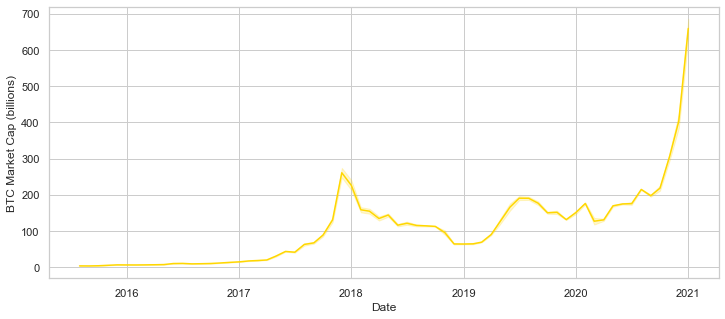

In [11]:
btccap_month = df[['Date', 'MarketCap_BTC']]
btccap_month['Date'] = btccap_month['Date'].values.astype('datetime64[M]')
fig = sns.lineplot(data=btccap_month, x='Date', y='MarketCap_BTC', color='gold')
fig.set(xlabel='Date', ylabel='BTC Market Cap (billions)');

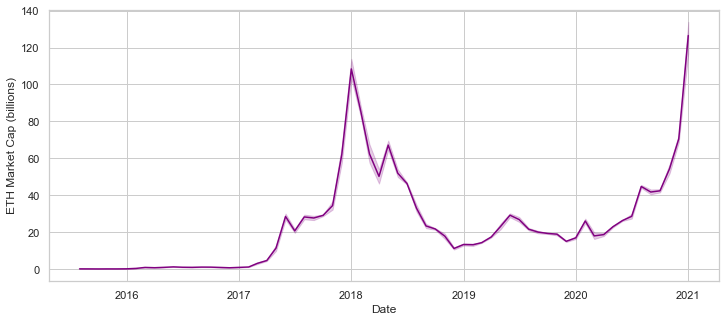

In [12]:
ethcap_month = df[['Date', 'MarketCap_ETH']]
ethcap_month['Date'] = ethcap_month['Date'].values.astype('datetime64[M]')
fig = sns.lineplot(data=ethcap_month, x='Date', y='MarketCap_ETH', color='purple')
fig.set(xlabel='Date', ylabel='ETH Market Cap (billions)');

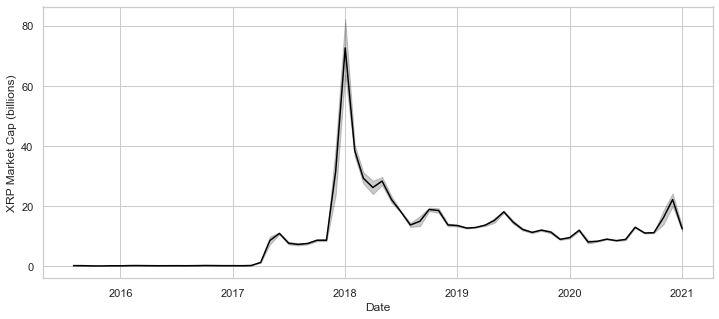

In [13]:
xrpcap_month = df[['Date', 'MarketCap_XRP']]
xrpcap_month['Date'] = xrpcap_month['Date'].values.astype('datetime64[M]')
fig = sns.lineplot(data=xrpcap_month, x='Date', y='MarketCap_XRP', color='black')
fig.set(xlabel='Date', ylabel='XRP Market Cap (billions)');

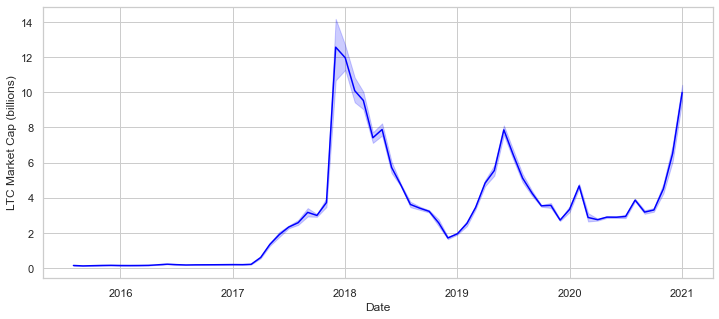

In [14]:
ltccap_month = df[['Date', 'MarketCap_LTC']]
ltccap_month['Date'] = ltccap_month['Date'].values.astype('datetime64[M]')
fig = sns.lineplot(data=ltccap_month, x='Date', y='MarketCap_LTC', color='blue')
fig.set(xlabel='Date', ylabel='LTC Market Cap (billions)');

As we can see, Bitcoin is by far the biggest token in terms of market capitalization. It makes sense considering the fact it's the oldest crytocurrency there is. Interestingly enough, we can see significant spike in market cap by the end of 2020 for BTC, ETH and LTC. XRP, however, does not show such spike. Why? We should look for the news about XRP and easily find an answer there: <br>
<br>
On December 22, 2020, The Securities and Exchange Commission announced that it has filed an action against Ripple Labs Inc (company that created XRP) and two of its executives alleging that they raised over $1.3 billion through an unregistered, ongoing digital asset securities offering. The largest US crypto exchange Coinbase removed XRP from its listed assets.<br>
<br>
No wonder people are not too eager to buy XRP now.<br>
<br>
We can also see, that all four coins reached their previous peak values at the end of 2017 - beginning of 2018. BTC and ETH, however, already passed those peak values which is a signal that the next bull market cycle has started. LTC is lagging behind a little bit and XRP will probably never recover from the lawsuit.

## 2. Largest Token (Daily Trading Volume)